In [1]:
!nvidia-smi

Mon May 29 11:11:44 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.85.12    Driver Version: 525.85.12    CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   52C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
from google.colab import drive

drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [ ]:
# Instalar PyTorch y torchvision:
!pip install torch torchvision

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# Pip install method (recommended)

!pip install ultralytics

from IPython import display
display.clear_output()

import ultralytics
ultralytics.checks()

Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 27.1/166.8 GB disk)


In [ ]:
from ultralytics import YOLO

from IPython.display import display, Image

    SUB1_Altitude  Pixel-cm
0            0.84   46.4332
1            0.95   43.1545
2            0.96   44.5856
3            0.99   35.7016
4            0.99   56.7153
5            1.00   42.6127
6            1.01   42.5130
7            1.03   60.3800
8            1.05   63.5690
9            1.06   34.0064
10           1.07   43.6965
11           1.08   28.3655
12           1.08   51.3074
13           1.09   56.2790
14           1.09   44.7290
15           3.49   78.6984
16           3.05   55.9269
17           3.00   36.7408
18           2.91   51.6109
19           2.90   70.4403
20           2.81   52.5582
21           2.76   29.7149
22           2.76   43.2263
23           2.74   42.5661
24           2.69   32.2872
25           2.68   38.7930
26           2.60   33.4695
27           2.60   58.3721
28           1.38   34.3972
29           1.37   33.0714
30           1.37   44.0291
31           1.36   31.8810
32           1.36   35.9489
33           1.36   30.4704
34           1.36   

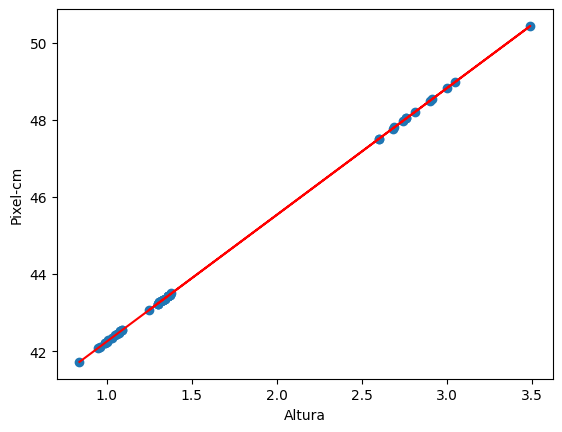

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from scipy import stats

# Cargar los datos del archivo .csv
data = pd.read_csv('/content/Regresión_cap.csv')

# Definir las variables x e y
x = data['Pixel-cm'].values.reshape(-1,1)
y = data['SUB1_Altitude'].values.reshape(-1,1)

# Crear el modelo de regresión lineal
model = LinearRegression()
model.fit(x, y)

# Calcular los residuos estudentizados
y_pred = model.predict(x)
residuals = y - y_pred
studentized_residuals = stats.zscore(residuals)

# Definir el umbral para detectar outliers
threshold = 3

# Filtrar los datos para eliminar outliers
filtered_data = data[abs(studentized_residuals) < threshold]

# Definir las variables x e y con los datos filtrados
x = filtered_data['SUB1_Altitude'].values.reshape(-1,1)
y = filtered_data['Pixel-cm'].values.reshape(-1,1)

# Crear el modelo de regresión lineal con los datos filtrados
model = LinearRegression()
model.fit(x, y)

# Predecir los valores de y para cada valor de x con los datos filtrados
y_pred = model.predict(x)

# Crear x_pred con los valores de x que van junto a y_pred
x_pred = x

# Mostrar la tabla con las alturas y el área predicha
print(filtered_data[['SUB1_Altitude', 'Pixel-cm']])

# Graficar los datos originales y la línea de regresión
plt.scatter(x_pred, y_pred)
plt.plot(x_pred, y_pred, color='red')
plt.ylabel('Pixel-cm')
plt.xlabel('Altura')
plt.show()

In [ ]:
# Definir la resolución de la imagen
resolution_x = 6048
resolution_y = 4024

# Calcular el área en píxeles de la imagen
area_pixels = resolution_x * resolution_y

# Calcular el área en cm^2 para cada altura en el archivo .csv
area_cm2 = area_pixels / y_pred**2

# Agregar la columna 'area_cm2' al archivo .csv
filtered_data = filtered_data.copy()
filtered_data.loc[:, 'area_cm2'] = area_cm2/10000
filtered_data.loc[:, 'SUB1_Altitude'] = x_pred

# Load the new data from the .xlsx file
new_data = pd.read_excel('/content/gdrive/MyDrive/Trabajo/telemetria/Capbreton/ICB20_TF08.xlsx')

# Convert the 'SUB1_Altitude' column to a numeric type
new_data['SUB1_Altitude'] = pd.to_numeric(new_data['SUB1_Altitude'], errors='coerce')

# Remove rows with NaN values in the 'SUB1_Altitude' column
new_data = new_data.dropna(subset=['SUB1_Altitude'])

# Extract the 'SUB1_Altitude' values from the new dataIA418_TF02
new_x = new_data['SUB1_Altitude'].values.reshape(-1, 1)

# Make predictions for the 'Pixel-cm' values using the model
new_y_pred = model.predict(new_x)

# Calculate the area in cm^2 for each altitude in the new data
new_area_m2 = area_pixels / new_y_pred**2

# Add a new column to the new data with the predicted 'Pixel-cm' values
new_data['Pixel-cm'] = new_y_pred

# Add a new column to the new data with the calculated 'area_cm2' values
new_data['area_m2'] = new_area_m2/10000

# Display the updated new data with the predicted 'Pixel-cm' and calculated 'area_cm2' columns
print(new_data[['SUB1_Altitude', 'Pixel-cm', 'area_m2']])

# Save the updated new data to an Excel file
new_data.to_excel('/content/IA418_TF22_updated.xlsx', index=False)


     SUB1_Altitude   Pixel-cm   area_m2
0             1.80  44.878123  1.208371
1             1.87  45.108220  1.196075
2             2.11  45.897123  1.155311
3             1.47  43.793381  1.268974
4             1.47  43.793381  1.268974
..             ...        ...       ...
175           2.35  46.686026  1.116596
176           2.16  46.061478  1.147081
177           1.93  45.305445  1.185684
178           2.14  45.995736  1.150362
179           2.04  45.667026  1.166982

[180 rows x 3 columns]


## Inference with YOLOv8

In [ ]:
%cd /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def
!yolo task=detect mode=predict model=/content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/runs/detect/Train/Aug/weights/best.pt conf=0.5 source=/content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08 save_json=True save=True 

/content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def
Ultralytics YOLOv8.0.109 🚀 Python-3.10.11 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
Model summary (fused): 268 layers, 68125494 parameters, 0 gradients

image 1/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0008.JPG: 544x800 6 Phakellias, 2 Dendrophyllias, 110.8ms
image 2/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0009.JPG: 544x800 5 Phakellias, 109.1ms
image 3/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0010.JPG: 544x800 7 Phakellias, 3 Dendrophyllias, 109.1ms
image 4/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0011.JPG: 544x800 8 Phakellias, 3 Dendrophyllias, 82.5ms
image 5/206 /content/gdrive/MyDrive/Trabajo/Object_Dete

In [ ]:
import re
import pandas as pd

resultados = """ 
image 1/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0008.JPG: 544x800 6 Phakellias, 2 Dendrophyllias, 110.8ms
image 2/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0009.JPG: 544x800 5 Phakellias, 109.1ms
image 3/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0010.JPG: 544x800 7 Phakellias, 3 Dendrophyllias, 109.1ms
image 4/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0011.JPG: 544x800 8 Phakellias, 3 Dendrophyllias, 82.5ms
image 5/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0012.JPG: 544x800 9 Phakellias, 2 Dendrophyllias, 80.2ms
image 6/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0013.JPG: 544x800 7 Phakellias, 3 Dendrophyllias, 80.1ms
image 7/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0014.JPG: 544x800 5 Phakellias, 4 Dendrophyllias, 109.0ms
image 8/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0015.JPG: 544x800 3 Phakellias, 3 Dendrophyllias, 83.8ms
image 9/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0016.JPG: 544x800 3 Phakellias, 3 Dendrophyllias, 109.1ms
image 10/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0017.JPG: 544x800 3 Phakellias, 2 Dendrophyllias, 83.7ms
image 11/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0018.JPG: 544x800 2 Phakellias, 6 Dendrophyllias, 109.1ms
image 12/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0019.JPG: 544x800 3 Phakellias, 1 Dendrophyllia, 100.2ms
image 13/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0020.JPG: 544x800 2 Phakellias, 2 Dendrophyllias, 82.5ms
image 14/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0021.JPG: 544x800 3 Phakellias, 4 Dendrophyllias, 109.1ms
image 15/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0022.JPG: 544x800 3 Phakellias, 4 Dendrophyllias, 83.8ms
image 16/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0023.JPG: 544x800 1 Dendrophyllia, 80.1ms
image 17/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0024.JPG: 544x800 3 Phakellias, 2 Dendrophyllias, 109.1ms
image 18/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0025.JPG: 544x800 1 Phakellia, 2 Dendrophyllias, 96.3ms
image 19/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0026.JPG: 544x800 1 Phakellia, 1 Dendrophyllia, 81.3ms
image 20/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0027.JPG: 544x800 10 Phakellias, 6 Dendrophyllias, 109.1ms
image 21/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0028.JPG: 544x800 10 Phakellias, 9 Dendrophyllias, 109.1ms
image 22/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0029.JPG: 544x800 1 Phakellia, 3 Dendrophyllias, 82.9ms
image 23/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0030.JPG: 544x800 6 Phakellias, 4 Dendrophyllias, 80.1ms
image 24/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0031.JPG: 544x800 5 Phakellias, 7 Dendrophyllias, 78.9ms
image 25/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0032.JPG: 544x800 15 Phakellias, 8 Dendrophyllias, 109.2ms
image 26/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0033.JPG: 544x800 14 Phakellias, 2 Dendrophyllias, 98.2ms
image 27/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0034.JPG: 544x800 10 Phakellias, 12 Dendrophyllias, 109.1ms
image 28/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0035.JPG: 544x800 10 Phakellias, 14 Dendrophyllias, 82.6ms
image 29/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0036.JPG: 544x800 2 Phakellias, 5 Dendrophyllias, 109.1ms
image 30/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0037.JPG: 544x800 1 Phakellia, 6 Dendrophyllias, 102.2ms
image 31/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0038.JPG: 544x800 1 Phakellia, 9 Dendrophyllias, 82.5ms
image 32/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0039.JPG: 544x800 6 Dendrophyllias, 109.1ms
image 33/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0040.JPG: 544x800 2 Dendrophyllias, 82.5ms
image 34/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0041.JPG: 544x800 2 Phakellias, 1 Dendrophyllia, 109.3ms
image 35/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0042.JPG: 544x800 1 Phakellia, 109.2ms
image 36/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0043.JPG: 544x800 3 Phakellias, 1 Dendrophyllia, 82.5ms
image 37/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0044.JPG: 544x800 4 Dendrophyllias, 109.1ms
image 38/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0045.JPG: 544x800 (no detections), 109.1ms
image 39/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0046.JPG: 544x800 (no detections), 83.8ms
image 40/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0047.JPG: 544x800 2 Phakellias, 2 Dendrophyllias, 80.2ms
image 41/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0048.JPG: 544x800 5 Phakellias, 4 Dendrophyllias, 109.1ms
image 42/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0049.JPG: 544x800 2 Phakellias, 2 Dendrophyllias, 109.1ms
image 43/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0050.JPG: 544x800 3 Phakellias, 86.5ms
image 44/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0051.JPG: 544x800 2 Phakellias, 3 Dendrophyllias, 80.1ms
image 45/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0052.JPG: 544x800 4 Phakellias, 3 Dendrophyllias, 109.2ms
image 46/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0053.JPG: 544x800 1 Phakellia, 5 Dendrophyllias, 107.6ms
image 47/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0054.JPG: 544x800 2 Phakellias, 6 Dendrophyllias, 98.2ms
image 48/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0055.JPG: 544x800 7 Phakellias, 3 Dendrophyllias, 86.6ms
image 49/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0056.JPG: 544x800 1 Phakellia, 5 Dendrophyllias, 80.1ms
image 50/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0057.JPG: 544x800 6 Phakellias, 3 Dendrophyllias, 78.9ms
image 51/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0058.JPG: 544x800 1 Phakellia, 6 Dendrophyllias, 109.1ms
image 52/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0059.JPG: 544x800 1 Phakellia, 5 Dendrophyllias, 100.2ms
image 53/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0060.JPG: 544x800 2 Phakellias, 1 Dendrophyllia, 82.5ms
image 54/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0061.JPG: 544x800 4 Phakellias, 80.1ms
image 55/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0062.JPG: 544x800 (no detections), 109.4ms
image 56/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0063.JPG: 544x800 1 Phakellia, 83.9ms
image 57/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0064.JPG: 544x800 (no detections), 109.2ms
image 58/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0065.JPG: 544x800 3 Phakellias, 83.8ms
image 59/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0066.JPG: 544x800 (no detections), 80.1ms
image 60/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0067.JPG: 544x800 3 Phakellias, 1 Dendrophyllia, 107.4ms
image 61/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0068.JPG: 544x800 5 Phakellias, 4 Dendrophyllias, 96.4ms
image 62/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0069.JPG: 544x800 5 Phakellias, 1 Dendrophyllia, 109.1ms
image 63/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0070.JPG: 544x800 3 Phakellias, 4 Dendrophyllias, 102.3ms
image 64/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0071.JPG: 544x800 3 Phakellias, 82.6ms
image 65/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0072.JPG: 544x800 6 Phakellias, 3 Dendrophyllias, 109.2ms
image 66/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0073.JPG: 544x800 15 Phakellias, 5 Dendrophyllias, 109.1ms
image 67/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0074.JPG: 544x800 11 Phakellias, 9 Dendrophyllias, 82.5ms
image 68/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0075.JPG: 544x800 11 Phakellias, 7 Dendrophyllias, 80.0ms
image 69/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0076.JPG: 544x800 2 Phakellias, 2 Dendrophyllias, 78.9ms
image 70/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0077.JPG: 544x800 2 Dendrophyllias, 109.1ms
image 71/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0078.JPG: 544x800 2 Phakellias, 2 Dendrophyllias, 109.1ms
image 72/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0079.JPG: 544x800 3 Phakellias, 109.1ms
image 73/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0080.JPG: 544x800 1 Dendrophyllia, 83.8ms
image 74/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0081.JPG: 544x800 2 Phakellias, 1 Dendrophyllia, 80.2ms
image 75/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0082.JPG: 544x800 (no detections), 109.1ms
image 76/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0083.JPG: 544x800 2 Phakellias, 5 Dendrophyllias, 88.2ms
image 77/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0084.JPG: 544x800 (no detections), 109.1ms
image 78/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0085.JPG: 544x800 2 Phakellias, 2 Dendrophyllias, 83.8ms
image 79/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0086.JPG: 544x800 7 Phakellias, 80.1ms
image 80/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0087.JPG: 544x800 11 Phakellias, 3 Dendrophyllias, 80.1ms
image 81/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0088.JPG: 544x800 12 Phakellias, 1 Dendrophyllia, 109.1ms
image 82/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0089.JPG: 544x800 3 Phakellias, 3 Dendrophyllias, 82.5ms
image 83/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0090.JPG: 544x800 1 Phakellia, 1 Dendrophyllia, 80.0ms
image 84/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0091.JPG: 544x800 2 Phakellias, 1 Dendrophyllia, 107.7ms
image 85/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0092.JPG: 544x800 1 Phakellia, 7 Dendrophyllias, 109.1ms
image 86/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0093.JPG: 544x800 3 Phakellias, 109.1ms
image 87/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0094.JPG: 544x800 (no detections), 82.6ms
image 88/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0095.JPG: 544x800 (no detections), 109.1ms
image 89/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0096.JPG: 544x800 1 Dendrophyllia, 83.8ms
image 90/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0097.JPG: 544x800 1 Phakellia, 109.1ms
image 91/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0098.JPG: 544x800 (no detections), 109.1ms
image 92/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0099.JPG: 544x800 2 Phakellias, 2 Dendrophyllias, 83.8ms
image 93/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0100.JPG: 544x800 4 Phakellias, 80.0ms
image 94/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0101.JPG: 544x800 1 Phakellia, 1 Dendrophyllia, 109.2ms
image 95/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0102.JPG: 544x800 2 Phakellias, 91.9ms
image 96/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0103.JPG: 544x800 (no detections), 109.1ms
image 97/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0104.JPG: 544x800 1 Phakellia, 1 Dendrophyllia, 85.2ms
image 98/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0105.JPG: 544x800 (no detections), 109.1ms
image 99/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0106.JPG: 544x800 1 Dendrophyllia, 83.8ms
image 100/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0107.JPG: 544x800 1 Phakellia, 1 Dendrophyllia, 80.0ms
image 101/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0108.JPG: 544x800 1 Phakellia, 1 Dendrophyllia, 109.1ms
image 102/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0109.JPG: 544x800 1 Dendrophyllia, 104.4ms
image 103/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0110.JPG: 544x800 2 Phakellias, 2 Dendrophyllias, 82.6ms
image 104/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0111.JPG: 544x800 1 Phakellia, 3 Dendrophyllias, 80.1ms
image 105/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0112.JPG: 544x800 2 Phakellias, 4 Dendrophyllias, 109.1ms
image 106/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0113.JPG: 544x800 4 Phakellias, 1 Dendrophyllia, 109.2ms
image 107/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0114.JPG: 544x800 4 Phakellias, 4 Dendrophyllias, 109.1ms
image 108/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0115.JPG: 544x800 7 Phakellias, 3 Dendrophyllias, 109.1ms
image 109/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0116.JPG: 544x800 1 Phakellia, 1 Dendrophyllia, 86.6ms
image 110/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0117.JPG: 544x800 1 Phakellia, 1 Dendrophyllia, 80.1ms
image 111/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0118.JPG: 544x800 4 Phakellias, 5 Dendrophyllias, 109.1ms
image 112/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0119.JPG: 544x800 4 Phakellias, 2 Dendrophyllias, 82.5ms
image 113/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0120.JPG: 544x800 2 Phakellias, 4 Dendrophyllias, 109.1ms
image 114/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0121.JPG: 544x800 1 Phakellia, 2 Dendrophyllias, 109.2ms
image 115/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0122.JPG: 544x800 3 Phakellias, 4 Dendrophyllias, 109.1ms
image 116/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0123.JPG: 544x800 5 Phakellias, 1 Dendrophyllia, 86.6ms
image 117/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0124.JPG: 544x800 1 Phakellia, 107.7ms
image 118/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0125.JPG: 544x800 5 Phakellias, 3 Dendrophyllias, 91.1ms
image 119/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0126.JPG: 544x800 2 Phakellias, 6 Dendrophyllias, 81.3ms
image 120/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0127.JPG: 544x800 2 Phakellias, 4 Dendrophyllias, 80.1ms
image 121/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0128.JPG: 544x800 1 Phakellia, 2 Dendrophyllias, 109.1ms
image 122/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0129.JPG: 544x800 1 Phakellia, 2 Dendrophyllias, 82.5ms
image 123/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0130.JPG: 544x800 3 Dendrophyllias, 109.1ms
image 124/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0131.JPG: 544x800 2 Phakellias, 3 Dendrophyllias, 98.2ms
image 125/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0132.JPG: 544x800 4 Phakellias, 2 Dendrophyllias, 92.9ms
image 126/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0133.JPG: 544x800 (no detections), 109.2ms
image 127/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0134.JPG: 544x800 (no detections), 83.8ms
image 128/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0135.JPG: 544x800 (no detections), 80.1ms
image 129/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0136.JPG: 544x800 (no detections), 109.1ms
image 130/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0137.JPG: 544x800 (no detections), 83.9ms
image 131/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0138.JPG: 544x800 (no detections), 80.1ms
image 132/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0139.JPG: 544x800 (no detections), 109.1ms
image 133/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0140.JPG: 544x800 (no detections), 83.8ms
image 134/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0141.JPG: 544x800 (no detections), 109.1ms
image 135/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0142.JPG: 544x800 (no detections), 83.8ms
image 136/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0143.JPG: 544x800 1 Phakellia, 80.0ms
image 137/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0144.JPG: 544x800 5 Phakellias, 109.1ms
image 138/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0145.JPG: 544x800 8 Phakellias, 83.8ms
image 139/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0146.JPG: 544x800 7 Phakellias, 109.1ms
image 140/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0147.JPG: 544x800 6 Phakellias, 83.9ms
image 141/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0148.JPG: 544x800 4 Phakellias, 1 Dendrophyllia, 109.1ms
image 142/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0149.JPG: 544x800 4 Phakellias, 3 Dendrophyllias, 82.5ms
image 143/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0150.JPG: 544x800 (no detections), 80.1ms
image 144/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0151.JPG: 544x800 (no detections), 109.2ms
image 145/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0152.JPG: 544x800 3 Dendrophyllias, 98.3ms
image 146/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0153.JPG: 544x800 1 Dendrophyllia, 91.1ms
image 147/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0154.JPG: 544x800 4 Phakellias, 2 Dendrophyllias, 81.3ms
image 148/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0155.JPG: 544x800 3 Phakellias, 4 Dendrophyllias, 80.1ms
image 149/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0156.JPG: 544x800 2 Phakellias, 1 Dendrophyllia, 109.2ms
image 150/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0157.JPG: 544x800 3 Phakellias, 2 Dendrophyllias, 107.6ms
image 151/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0158.JPG: 544x800 2 Phakellias, 100.3ms
image 152/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0159.JPG: 544x800 3 Phakellias, 4 Dendrophyllias, 82.6ms
image 153/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0160.JPG: 544x800 3 Phakellias, 2 Dendrophyllias, 109.1ms
image 154/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0161.JPG: 544x800 2 Dendrophyllias, 92.4ms
image 155/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0162.JPG: 544x800 1 Phakellia, 1 Dendrophyllia, 109.1ms
image 156/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0163.JPG: 544x800 1 Phakellia, 1 Dendrophyllia, 107.9ms
image 157/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0164.JPG: 544x800 1 Dendrophyllia, 89.6ms
image 158/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0165.JPG: 544x800 1 Dendrophyllia, 81.2ms
image 159/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0166.JPG: 544x800 (no detections), 80.1ms
image 160/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0167.JPG: 544x800 (no detections), 109.1ms
image 161/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0168.JPG: 544x800 2 Phakellias, 109.1ms
image 162/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0169.JPG: 544x800 (no detections), 82.5ms
image 163/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0170.JPG: 544x800 (no detections), 109.2ms
image 164/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0171.JPG: 544x800 (no detections), 98.3ms
image 165/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0172.JPG: 544x800 (no detections), 109.1ms
image 166/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0173.JPG: 544x800 (no detections), 109.1ms
image 167/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0174.JPG: 544x800 (no detections), 109.2ms
image 168/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0175.JPG: 544x800 1 Phakellia, 1 Dendrophyllia, 109.1ms
image 169/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0176.JPG: 544x800 1 Phakellia, 83.8ms
image 170/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0177.JPG: 544x800 (no detections), 109.1ms
image 171/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0178.JPG: 544x800 2 Phakellias, 2 Dendrophyllias, 106.8ms
image 172/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0179.JPG: 544x800 4 Phakellias, 1 Dendrophyllia, 82.5ms
image 173/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0180.JPG: 544x800 9 Phakellias, 1 Dendrophyllia, 111.5ms
image 174/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0181.JPG: 544x800 1 Phakellia, 3 Dendrophyllias, 109.2ms
image 175/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0182.JPG: 544x800 (no detections), 82.5ms
image 176/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0183.JPG: 544x800 2 Phakellias, 2 Dendrophyllias, 80.1ms
image 177/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0184.JPG: 544x800 1 Phakellia, 1 Dendrophyllia, 109.1ms
image 178/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0185.JPG: 544x800 2 Phakellias, 2 Dendrophyllias, 82.5ms
image 179/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0186.JPG: 544x800 4 Dendrophyllias, 109.1ms
image 180/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0187.JPG: 544x800 3 Phakellias, 3 Dendrophyllias, 82.6ms
image 181/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0188.JPG: 544x800 (no detections), 109.1ms
image 182/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0189.JPG: 544x800 1 Phakellia, 83.8ms
image 183/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0190.JPG: 544x800 2 Phakellias, 80.1ms
image 184/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0191.JPG: 544x800 3 Phakellias, 80.2ms
image 185/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0192.JPG: 544x800 (no detections), 80.0ms
image 186/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0193.JPG: 544x800 (no detections), 109.1ms
image 187/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0194.JPG: 544x800 1 Phakellia, 4 Dendrophyllias, 83.8ms
image 188/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0195.JPG: 544x800 (no detections), 109.2ms
image 189/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0196.JPG: 544x800 3 Phakellias, 1 Dendrophyllia, 83.9ms
image 190/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0197.JPG: 544x800 2 Phakellias, 80.1ms
image 191/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0198.JPG: 544x800 2 Phakellias, 2 Dendrophyllias, 109.1ms
image 192/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0199.JPG: 544x800 3 Phakellias, 4 Dendrophyllias, 82.5ms
image 193/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0200.JPG: 544x800 3 Phakellias, 4 Dendrophyllias, 109.2ms
image 194/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0201.JPG: 544x800 2 Phakellias, 1 Dendrophyllia, 82.6ms
image 195/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0202.JPG: 544x800 2 Phakellias, 3 Dendrophyllias, 80.1ms
image 196/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0203.JPG: 544x800 6 Dendrophyllias, 107.6ms
image 197/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0204.JPG: 544x800 5 Dendrophyllias, 100.2ms
image 198/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0205.JPG: 544x800 4 Phakellias, 6 Dendrophyllias, 82.5ms
image 199/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0206.JPG: 544x800 6 Dendrophyllias, 109.1ms
image 200/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0207.JPG: 544x800 2 Phakellias, 3 Dendrophyllias, 109.1ms
image 201/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0208.JPG: 544x800 1 Phakellia, 3 Dendrophyllias, 83.8ms
image 202/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0209.JPG: 544x800 2 Phakellias, 4 Dendrophyllias, 109.1ms
image 203/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0210.JPG: 544x800 3 Phakellias, 4 Dendrophyllias, 82.6ms
image 204/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0211.JPG: 544x800 (no detections), 88.4ms
image 205/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0212.JPG: 544x800 (no detections), 109.1ms
image 206/206 /content/gdrive/MyDrive/Trabajo/Object_Detection/YOLOv8/YOLOv8_def/Dataset/predictions/ICB20/ICB20_TF08/ICB20_TF08_0213.JPG: 544x800 (no detections), 109.2ms
Speed: 4.5ms preprocess, 95.8ms inference, 2.2ms postprocess per image at shape (1, 3, 800, 800)
Results saved to runs/detect/predict28
"""

imagenes = []
phakellias = []
dendrophyllias = []

for line in resultados.split('\n'):
    image_match = re.search(r'ICB20_TF08_\d+.JPG', line)
    if image_match:
        imagenes.append(image_match.group(0))
        
        phakellia_match = re.search(r'(\d+) Phakellias?', line)
        phakellia_count = int(phakellia_match.group(1)) if phakellia_match else 0
        phakellias.append(phakellia_count)

        dendrophyllia_match = re.search(r'(\d+) Dendrophyllias?', line)
        dendrophyllia_count = int(dendrophyllia_match.group(1)) if dendrophyllia_match else 0
        dendrophyllias.append(dendrophyllia_count)

data = {'Image': imagenes,
        'Phakellia': phakellias,
        'Dendrophyllia': dendrophyllias}

df = pd.DataFrame(data)
df.to_csv('inference.csv', index=False)

print(df)

                   Image  Phakellia  Dendrophyllia
0    ICB20_TF08_0008.JPG          6              2
1    ICB20_TF08_0009.JPG          5              0
2    ICB20_TF08_0010.JPG          7              3
3    ICB20_TF08_0011.JPG          8              3
4    ICB20_TF08_0012.JPG          9              2
..                   ...        ...            ...
201  ICB20_TF08_0209.JPG          2              4
202  ICB20_TF08_0210.JPG          3              4
203  ICB20_TF08_0211.JPG          0              0
204  ICB20_TF08_0212.JPG          0              0
205  ICB20_TF08_0213.JPG          0              0

[206 rows x 3 columns]


In [ ]:
import pandas as pd

# Lee el archivo "IA418_TF16_updated.csv" en un DataFrame de pandas
df_updated = pd.read_excel('/content/IA418_TF22_updated.xlsx')

# Une los dos DataFrames (`df` y `df_updated`) usando la función `merge` de pandas
merged_df = pd.merge(df, df_updated, left_on='Image', right_on='Foto', how='inner')

# Guarda el DataFrame resultante en un archivo .csv
merged_df.to_csv('IA418_TF18_updated.csv', index=False)

In [ ]:
import pandas as pd

# Lee el archivo "IA418_TF16_updated.csv" en un DataFrame de pandas
df_updated = pd.read_csv('IA418_TF18_updated.csv')

df_updated['Phakellia_m2'] = df_updated['Phakellia'] / df_updated['area_m2']
df_updated['Dendrophyllia_m2'] = df_updated['Dendrophyllia'] / df_updated['area_m2']

# Selecciona solo las columnas que deseas mantener en el nuevo archivo .csv
selected_columns = df_updated[['Image', 'Phakellia', 'Dendrophyllia', 'SUB1_Lon', 'SUB1_Lat', 'area_m2', 'Phakellia_m2','Dendrophyllia_m2']]

# Guarda el DataFrame resultante en un nuevo archivo .csv
selected_columns.to_excel('/content/map_ICB20_TF08.xlsx', index=False)
#new_data.to_csv('map_IA418_TF18.csv')

In [24]:
import pandas as pd

df_updated = pd.read_excel('/content/gdrive/MyDrive/Trabajo/Object_Detection/Mapas/Capbreton/map_ICB20_TF08.xlsx')
# Selecciona solo las columnas que deseas mantener en el nuevo archivo .csv
selected_columns = df_updated[['SUB1_Lon', 'SUB1_Lat', 'Phakellia_m2']]

# Guarda el DataFrame resultante en un nuevo archivo .csv
selected_columns.to_csv('/content/map_ICB20_TF08.csv', index=False)

In [ ]:
import pandas as pd

# Selecciona solo las columnas que deseas mostrar en la tabla
selected_columns = df_updated[['Image', 'Phakellia', 'Dendrophyllia', 'SUB1_Lon', 'SUB1_Lat', 'Water_Depth', 'area_m2', 'Phakellia_m2','Dendrophyllia_m2']]

# Aplica un estilo simple a la tabla
styled_table = selected_columns.style.set_properties(**{
    'border': '1px solid black',
    'text-align': 'left'
})

# Muestra la tabla
styled_table

In [ ]:
df_updated

Image  Phakellia  Dendrophyllia  SUB1_Lon   SUB1_Lat  \
0    IA418_TF22_0003.JPG          0              3 -5.886859  43.746763   
1    IA418_TF22_0004.JPG          5              4 -5.886893  43.746764   
2    IA418_TF22_0005.JPG          4              6 -5.886928  43.746770   
3    IA418_TF22_0006.JPG          0              2 -5.886957  43.746775   
4    IA418_TF22_0007.JPG          1              2 -5.886995  43.746780   
..                   ...        ...            ...       ...        ...   
175  IA418_TF22_0181.JPG          0              0 -5.893434  43.747629   
176  IA418_TF22_0182.JPG          0              0 -5.893470  43.747636   
177  IA418_TF22_0183.JPG          0              0 -5.893511  43.747643   
178  IA418_TF22_0184.JPG          0              0 -5.893546  43.747648   
179  IA418_TF22_0185.JPG          0              0 -5.893577  43.747650   

     Water_Depth  USBL_Depth  SUB1_Altitude      Time  SHIP_COG  SUB1_COG  \
0        123.546     123.111           3.17  06:51:40     264.0     239.0   
1        123.641     122.352           3.23  06:51:50     280.4     247.2   
2        123.729     122.939           2.61  06:52:01     285.4     253.4   
3        123.861     123.138           2.67  06:52:10     291.2     258.2   
4        123.733     123.100           2.65  06:52:20     282.3     247.4   
..           ...         ...            ...       ...       ...       ...   
175      125.080     123.844           2.65  07:21:01     311.7     282.9   
176      124.578     123.888           2.29  07:21:11     313.3     278.0   
177      125.137     124.411           2.46  07:21:21      81.6     274.1   
178      124.814     124.146           2.42  07:21:31     100.2     276.4   
179      124.952     123.979           2.77  07:21:41     348.0     275.9   

     Temperature  Salinity  SUB1_Depth  Density                 Foto  \
0        11.6654   35.5519     120.376  27.0818  IA418_TF22_0003.JPG   
1        11.6683   35.5509     120.411  27.0805  IA418_TF22_0004.JPG   
2        11.6663   35.5513     121.119  27.0812  IA418_TF22_0005.JPG   
3        11.6651   35.5515     121.191  27.0815  IA418_TF22_0006.JPG   
4        11.6644   35.5507     121.083  27.0811  IA418_TF22_0007.JPG   
..           ...       ...         ...      ...                  ...   
175      11.6552   35.5508     122.430  27.0829  IA418_TF22_0181.JPG   
176      11.6554   35.5504     122.288  27.0825  IA418_TF22_0182.JPG   
177      11.6552   35.5509     122.677  27.0830  IA418_TF22_0183.JPG   
178      11.6554   35.5507     122.394  27.0827  IA418_TF22_0184.JPG   
179      11.6567   35.5494     122.182  27.0815  IA418_TF22_0185.JPG   

      Pixel-cm   area_m2  Phakellia_per_m2  Dendrophyllia_per_m2  
0    28.597101  2.934724          0.000000              1.022243  
1    27.910038  3.080991          1.622855              1.298284  
2    35.009694  1.958099          2.042798              3.064197  
3    34.322630  2.037277          0.000000              0.981702  
4    34.551651  2.010359          0.497424              0.994847  
..         ...       ...               ...                   ...  
175  34.551651  2.010359          0.000000              0.000000  
176  38.674032  1.604620          0.000000              0.000000  
177  36.727352  1.779230          0.000000              0.000000  
178  37.185395  1.735667          0.000000              0.000000  
179  33.177524  2.180335          0.000000              0.000000  

[180 rows x 20 columns]

In [ ]:
!pip install diagrams

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.4/24.4 MB 44.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 877.7/877.7 kB 56.2 MB/s eta 0:00:00


In [ ]:
from diagrams import Diagram, Cluster, Edge
from diagrams.onprem.compute import Server
from diagrams.onprem.database import PostgreSQL
from diagrams.onprem.inmemory import Redis
from diagrams.onprem.network import Internet

with Diagram("Pipeline de detección de objetos", show=False):
    with Cluster("Input"):
        input = [Server("Imagen 1"), Server("Imagen 2"), Server("Imagen 3")]

    with Cluster("Procesamiento"):
        model = Redis("YOLOv8")
        db = PostgreSQL("Base de datos")

    with Cluster("Output"):
        output = Internet("Mapa de densidad")

    input >> model >> db >> output